In [1]:
import os
import librosa
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Path to dataset and saved features
base_dir = "dataset"
labels = ['Normal', 'Abnormal']
feature_file = "features.npy"
label_file = "labels.npy"

# Function to extract features (MFCCs)
def extract_features(file_path, n_mfcc=20):
    try:
        audio, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        return mfccs_mean
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Load or preprocess features
if os.path.exists(feature_file) and os.path.exists(label_file):
    print("Loading preprocessed features...")
    X = np.load(feature_file)
    y = np.load(label_file)
else:
    print("Extracting features from audio files...")
    features = []
    targets = []

    for label in labels:
        folder_path = os.path.join(base_dir, label)
        for fname in os.listdir(folder_path):
            if fname.endswith(".wav"):
                file_path = os.path.join(folder_path, fname)
                mfcc_feat = extract_features(file_path)
                if mfcc_feat is not None:
                    features.append(mfcc_feat)
                    targets.append(0 if label == 'Normal' else 1)

    X = np.array(features)
    y = np.array(targets)

    # Save features and labels
    np.save(feature_file, X)
    np.save(label_file, y)
    print("Features saved.")

Loading preprocessed features...


In [2]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("RandomForestClassifier Classification Report:")
print(classification_report(y_test, y_pred, target_names=labels))

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

      Normal       0.91      0.95      0.93       198
    Abnormal       0.95      0.92      0.94       224

    accuracy                           0.93       422
   macro avg       0.93      0.93      0.93       422
weighted avg       0.93      0.93      0.93       422



<Figure size 600x500 with 0 Axes>

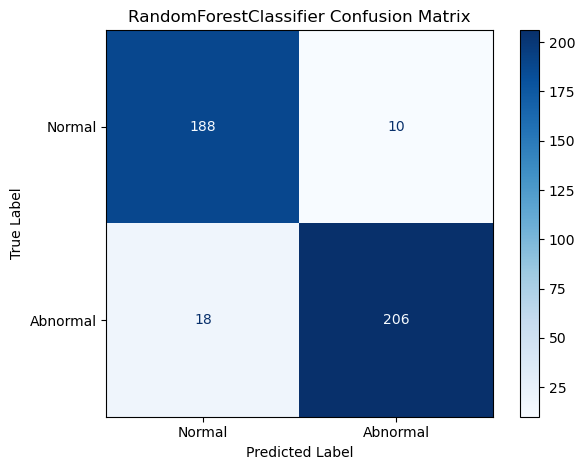

In [3]:
# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
# Plot
plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("RandomForestClassifier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [4]:
# proposed algorithm

In [5]:
# Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("\n🩺 Decision Tree Classification Report:")
print(classification_report(y_test, y_pred, target_names=labels))


🩺 Decision Tree Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      0.95      0.96       198
    Abnormal       0.96      0.97      0.96       224

    accuracy                           0.96       422
   macro avg       0.96      0.96      0.96       422
weighted avg       0.96      0.96      0.96       422



<Figure size 600x500 with 0 Axes>

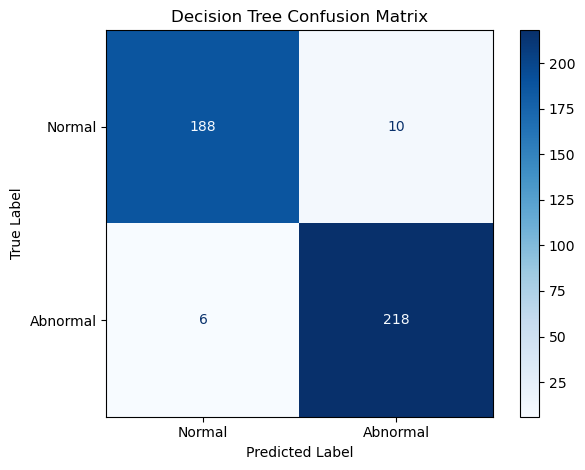

In [6]:

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
# Plot
plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [7]:
# prediction

In [8]:
# Function to predict a new audio file
def predict_audio(file_path):
    mfcc_feat = extract_features(file_path)
    if mfcc_feat is None:
        return "Error: Could not process the file."
    
    mfcc_feat = mfcc_feat.reshape(1, -1)  # Reshape for prediction
    prediction = clf.predict(mfcc_feat)[0]
    return labels[prediction]


In [9]:
# Example usage
test_file = r"dataset\Abnormal\artifact__201105040918 - Copy.wav"
result = predict_audio(test_file)
print(f"Prediction: {result}")


Prediction: Abnormal


In [10]:
# Example usage
test_file = r"dataset\normal\normal__103_1305031931979_D2.wav"
result = predict_audio(test_file)
print(f"Prediction: {result}")


Prediction: Normal
